In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [104]:
file_path = "filtered_data_kalman.xlsx"
df = pd.read_excel(file_path)

In [105]:
df.head()

,Entry,R,G,B,L,a,b,H,S,V,pH
0,1,132.421900,138.229800,53.935900,54.928100,-13.554800,41.861400,76.294800,65.869500,54.324000,6.0
1,2,138.637048,143.986971,59.568733,57.070434,-13.376742,41.729290,77.730742,64.337488,56.584362,6.0
2,3,140.270149,146.899660,70.360437,58.191672,-13.138922,37.839298,80.374934,58.423249,57.758332,6.0
3,4,138.995971,147.176499,73.962323,58.223417,-13.442850,36.100567,81.705812,56.246422,57.853953,6.0
4,5,142.074601,149.007879,71.115780,58.929880,-13.389615,38.329525,79.346646,58.159746,58.562525,6.0


In [106]:
features = ['R', 'G', 'B', 'L', 'a', 'b', 'H', 'S', 'V']
X = df[features].values
Y = df['pH'].values

In [107]:
print(X[:5])
print(Y[:5])

[[132.4219     138.2298      53.9359      54.9281     -13.5548
   41.8614      76.2948      65.8695      54.324     ]
 [138.63704761 143.98697125  59.56873283  57.07043425 -13.37674154
   41.72929043  77.73074183  64.33748797  56.58436187]
 [140.27014941 146.89965951  70.36043706  58.1916723  -13.13892163
   37.83929765  80.37493445  58.42324907  57.75833245]
 [138.99597131 147.1764987   73.96232342  58.22341726 -13.44284971
   36.10056662  81.7058124   56.24642155  57.85395327]
 [142.07460103 149.00787892  71.11577976  58.92987955 -13.38961461
   38.32952542  79.34664646  58.15974577  58.56252525]]
[6. 6. 6. 6. 6.]


In [108]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [109]:
def nn(input_dim):
    inputs = tf.keras.Input(shape=(input_dim,))
    x = tf.keras.layers.Dense(512, activation='tanh')(inputs)
    x = tf.keras.layers.Dense(256, activation='tanh')(x)
    x = tf.keras.layers.Dense(128, activation='tanh')(x)
    outputs = tf.keras.layers.Dense(1)(x)
    return tf.keras.Model(inputs, outputs)

In [115]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=16, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 0.0626
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0624
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0622
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - val_loss: 0.0761
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - val_loss: 0.0790
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - val_loss: 0.0685
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0694
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - val_loss: 0.0918
Epoch 9/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - val_loss: 0.0614
Epoch 10/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - val_loss: 0.0775
Epoch 11/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - val_loss: 0.0780
Epoch 12/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

In [116]:
y_pred_train = model.predict(X_train)

r2_train = r2_score(Y_train, y_pred_train)
mse_train = mean_squared_error(Y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(Y_train, y_pred_train)

print(f"R² Score: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R² Score: 0.9880
MSE: 0.0161
RMSE: 0.1269
MAE: 0.0898


In [117]:
y_pred_nn = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [118]:
r2_nn = r2_score(Y_test, y_pred_nn)
mse_nn = mean_squared_error(Y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(Y_test, y_pred_nn)

print(f"R² Score: {r2_nn:.4f}")
print(f"MSE: {mse_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")

R² Score: 0.9574
MSE: 0.0689
RMSE: 0.2625
MAE: 0.1793


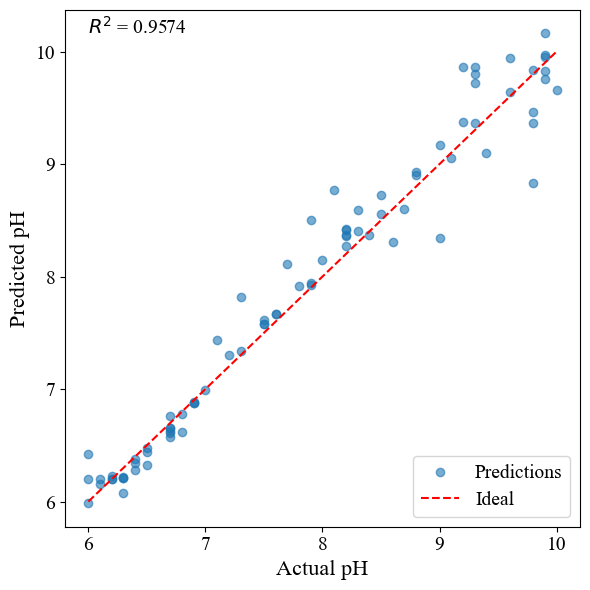

In [120]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred_nn, alpha=0.6, label='Predictions')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', label='Ideal')
plt.xlabel("Actual pH", fontsize=16)
plt.ylabel("Predicted pH", fontsize=16)
plt.text(x=min(Y_test), y=max(y_pred_nn), s=f"$R^2$ = {r2_nn:.4f}", fontsize=14, color='black')
plt.tick_params(axis='both', labelsize=14)
plt.grid(False)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("NN.png", dpi=300, bbox_inches='tight')
plt.show()